In [1]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc("font", family='Microsoft YaHei')

# 读取MAT文件   
data1 = loadmat('0_0.mat')  # 正常信号
data2 = loadmat('21_1.mat') # 0.021英寸 内圈
data3 = loadmat('21_2.mat') # 0.021英寸 滚珠
data4 = loadmat('21_3.mat') # 0.021英寸 外圈
# 注意，读取出来的data是字典格式，可以通过函数type(data)查看。 


file_names = ['0_0.mat','21_1.mat','21_2.mat','21_3.mat']

for file in file_names:
    # 读取MAT文件
    data = loadmat(f'matfiles\\{file}')
    print(list(data.keys()))

['__header__', '__version__', '__globals__', 'X097_DE_time', 'X097_FE_time', 'X097RPM']
['__header__', '__version__', '__globals__', 'X209_DE_time', 'X209_FE_time', 'X209_BA_time', 'X209RPM']
['__header__', '__version__', '__globals__', 'X222_DE_time', 'X222_FE_time', 'X222_BA_time', 'X222RPM']
['__header__', '__version__', '__globals__', 'X234_DE_time', 'X234_FE_time', 'X234_BA_time', 'X234RPM']


In [2]:
# DE - drive end accelerometer data 驱动端加速度数据
data_list1 = data1['X097_DE_time'].reshape(-1) 
data_list2 = data2['X209_DE_time'].reshape(-1)  
data_list3 = data3['X222_DE_time'].reshape(-1) 
data_list4 = data4['X234_DE_time'].reshape(-1) 

time_step= 1024
# 划窗取值（1024）
data_list1 = data_list1[0:time_step]
data_list2 = data_list2[0:time_step]
data_list3 = data_list3[0:time_step]
data_list4 = data_list4[0:time_step]

x_list = [x for x in range(time_step)]

In [3]:
# 1. 峭度（Kurtosis）：衡量信号的尖锐程度，用于检测信号中的高频成分。
import numpy as np
from scipy.stats import kurtosis

# 内圈故障 信号数据
signal = data_list2

# 计算信号的峭度
kurt = kurtosis(signal)

print("Signal Kurtosis:", kurt)
type(kurt)


Signal Kurtosis: 3.133732833964281


numpy.float64

In [4]:
# 2. 熵值（Entropy）：衡量信号的复杂程度和随机性，用于检测信号的频谱特性。
import numpy as np
from scipy.stats import entropy

# 内圈故障 信号数据
signal = data_list2

# 计算信号的熵值
ent = entropy(signal)

print("Signal Entropy:", ent)
if (ent <-0.000001):
    print(0)
# Signal Entropy: -inf 表示  负无穷（-inf），则表示信号的熵为无穷大。这通常意味着信号具有非常高的不确定性和复杂性，其中的值没有明显的模式或规律

Signal Entropy: -inf
0


In [5]:
# 3. 分形值（Fractal Dimension）：衡量信号的自相似性和复杂度，用于分析信号的分形特征。
import numpy as np
import nolds

# 内圈故障 信号数据
signal = data_list2

# 计算信号的分形维度
fd = nolds.dfa(signal)

print("Signal Fractal Dimension:", fd)

Signal Fractal Dimension: 0.3111825316491808


In [6]:
# 4. 波形指标（Waveform Indicators）：包括峰值因子、脉冲因子、裕度因子等，用于分析信号的时域特征。
import numpy as np

# 内圈故障 信号数据
signal = data_list2

# 计算峰值因子
peak_factor = np.max(np.abs(signal)) / np.sqrt(np.mean(np.square(signal)))

# 计算脉冲因子
pulse_factor = np.max(np.abs(signal)) / np.mean(np.abs(signal))

# 计算裕度因子
crest_factor = np.max(np.abs(signal)) / np.mean(np.sqrt(np.mean(np.square(signal))))

print("Peak Factor:", peak_factor)
print("Pulse Factor:", pulse_factor)
print("Crest Factor:", crest_factor)

Peak Factor: 4.559592057267174
Pulse Factor: 6.4887998233785655
Crest Factor: 4.559592057267174


In [7]:
# 5. 频谱指标（Spectral Indicators）：包括峰值频率、能量比值、谱线形指标等，用于分析信号的频域特征。
import numpy as np
from scipy.fft import fft, fftfreq
from scipy.signal import welch, find_peaks

# 内圈故障 信号数据
signal = data_list2

# 计算信号的频谱
sampling_rate = 1024  # 采样率
freq, power_spectrum = welch(signal, fs=sampling_rate)

# 计算峰值频率
peak_freqs, _ = find_peaks(power_spectrum, height=np.mean(power_spectrum))  # 找到峰值
peak_frequency = freq[peak_freqs]

# 计算能量比值
total_energy = np.sum(power_spectrum)
peak_energy = np.sum(power_spectrum[peak_freqs])
energy_ratio = peak_energy / total_energy

# 计算谱线形指标
spectral_flatness = np.exp(np.mean(np.log(power_spectrum))) / (np.mean(power_spectrum))

print("Peak Frequency:", peak_frequency)
print("Energy Ratio:", energy_ratio)
print("Spectral Flatness:", spectral_flatness)

Peak Frequency: [ 40.  52. 236. 248. 264. 276.]
Energy Ratio: 0.31785443199204044
Spectral Flatness: 0.03574645733241866


C:\Users\19713\AppData\Roaming\Python\Python311\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\19713\AppData\Roaming\Python\Python311\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


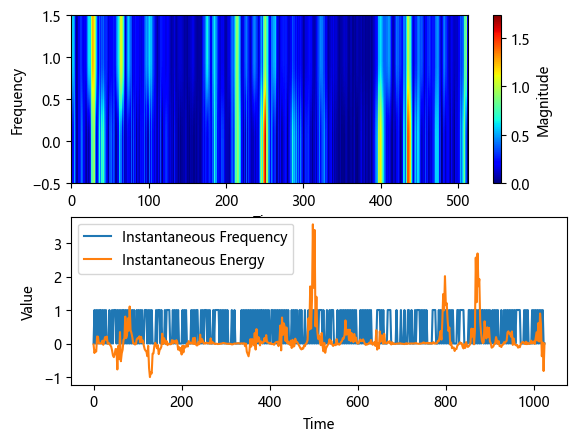

In [8]:
# 6. 频域指标（Time-Frequency Indicators）：包括瞬时频率、瞬时能量等，用于分析信号的时频特征。
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft

# 内圈故障 信号数据
signal = data_list2

# 计算信号的短时傅里叶变换
frequencies, time_points, magnitude = stft(signal, nperseg=3)

# 计算瞬时频率
instantaneous_frequency = np.argmax(magnitude, axis=0)

# 计算瞬时能量
instantaneous_energy = np.sum(np.square(magnitude), axis=0)

# 可视化结果
plt.subplot(2, 1, 1)
plt.imshow(np.abs(magnitude), aspect='auto', cmap='jet', origin='lower')
plt.colorbar(label='Magnitude')
plt.ylabel('Frequency')
plt.xlabel('Time')

plt.subplot(2, 1, 2)
plt.plot(time_points, instantaneous_frequency, label='Instantaneous Frequency')
plt.plot(time_points, instantaneous_energy, label='Instantaneous Energy')
plt.legend()
plt.ylabel('Value')
plt.xlabel('Time')

plt.show()

In [9]:
# 7. 统计特征（Statistical Features）：包括均值、方差、偏度等，用于描述信号的统计特性。
import numpy as np
from scipy.stats import skew

# 内圈故障 信号数据
signal = data_list2

# 计算均值
mean = np.mean(signal)

# 计算方差
variance = np.var(signal)

# 计算偏度
skewness = skew(signal)

print("Mean:", mean)
print("Variance:", variance)
print("Skewness:", skewness)

Mean: 0.02045667415169661
Variance: 0.2822885635231536
Skewness: 0.27659374704921325


In [10]:
# 8. 小波包特征（Wavelet Packet Features）：通过小波变换提取的特征，用于分析信号的时频局部特性。

import numpy as np
import pywt

# 内圈故障 信号数据
signal = data_list2

# 进行小波包分解
wavelet = 'db4'  # 选择小波基函数
level = 3  # 设置小波包分解的层数
coeffs = pywt.wavedec(signal, wavelet, level=level)

# 提取小波包特征
features = []
for i in range(level + 1):
    for j in range(len(coeffs[i])):
        energy = np.sum(np.square(coeffs[i][j]))
        features.append(energy)

print("Wavelet Packet Features:", features)

Wavelet Packet Features: [0.48451841327928147, 1.0886926451253658, 0.18377349670492735, 0.7914632873463371, 0.8913570747905672, 0.08054901054123506, 0.0007198089036667788, 0.0684032962176726, 0.1366104181063187, 0.007095137185875123, 0.09863113264627196, 0.08620320517883676, 0.15860052817501763, 0.20420242029064686, 0.09245636932614815, 0.017484411385869255, 0.014542090715073099, 0.0010910346044330794, 0.13138625448731256, 0.05002163647431783, 0.024328448860743285, 0.3636557241673502, 0.015516551070838705, 0.09406370772890092, 0.41517485659608816, 0.14361936752980994, 0.013053550437172084, 0.00290811724405737, 0.05653614879173103, 0.02920231834354667, 0.1819646139535478, 0.2270810443590718, 0.00013287505289206176, 0.18671166305027526, 0.14791349375586543, 0.07426483611694303, 0.08716561451065503, 0.02361808444150877, 0.11429183095867222, 0.005589516165951037, 0.002358950641094616, 0.0009779444724699667, 0.0011498870085316323, 0.015001598878549505, 0.002443533550096585, 0.03197885022420

In [11]:
# 9. 振动特征（Vibration Features）：包括峰值振动、有效值振动等，用于描述信号的振动特性。
import numpy as np

# 内圈故障 信号数据
signal = data_list2

# 计算峰值振动
peak_vibration = np.max(np.abs(signal))

# 计算有效值振动
rms_vibration = np.sqrt(np.mean(np.square(signal)))

print("Peak Vibration:", peak_vibration)
print("RMS Vibration:", rms_vibration)

Peak Vibration: 2.424344311377246
RMS Vibration: 0.531702020910681
